In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset

Link: https://www.kaggle.com/chirag9073/europe-economic-crisis 

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Europe_crisis.csv")
dataset.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,AUT,Austria,1800.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,AUT,Austria,1801.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,AUT,Austria,1802.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,AUT,Austria,1803.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,AUT,Austria,1804.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0


# Target Column



The dataset contains information about Banking, Debt, Financial, Inflation, and Systemic Crises that occured in 13 European countries in the last 2 centries. 

The target column that I chose is "Currency crises" which indicates the how many currency crises have occured. 

In [ ]:
ds = dataset['Currency Crises'].value_counts()
ds

0    4203
1     343
2      11
Name: Currency Crises, dtype: int64

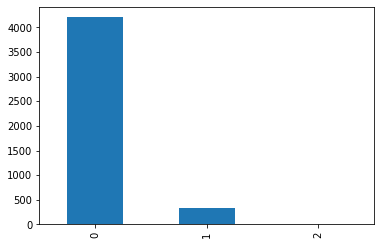

In [ ]:
ds.plot.bar()

# Detecting Missing values

In [ ]:
missing_values_dataset = dataset.isnull().sum()
percentages = 100 * dataset.isnull().sum() / len(dataset)
missing_values = pd.concat([missing_values_dataset, percentages], axis = 1)
missing_values.columns = ['Num. missing values', 'Percentage of missing values']
missing_values

,Num. missing values,Percentage of missing values
Unnamed: 0,0,0.000000
CC3,0,0.000000
Country,0,0.000000
Year,0,0.000000
Banking Crisis,476,10.445469
Systemic Crisis,12,0.263331
exch_usd,825,18.104016
National Currency,435,9.545754
exch_sources,1,0.021944
Domestic Debt,661,14.505157


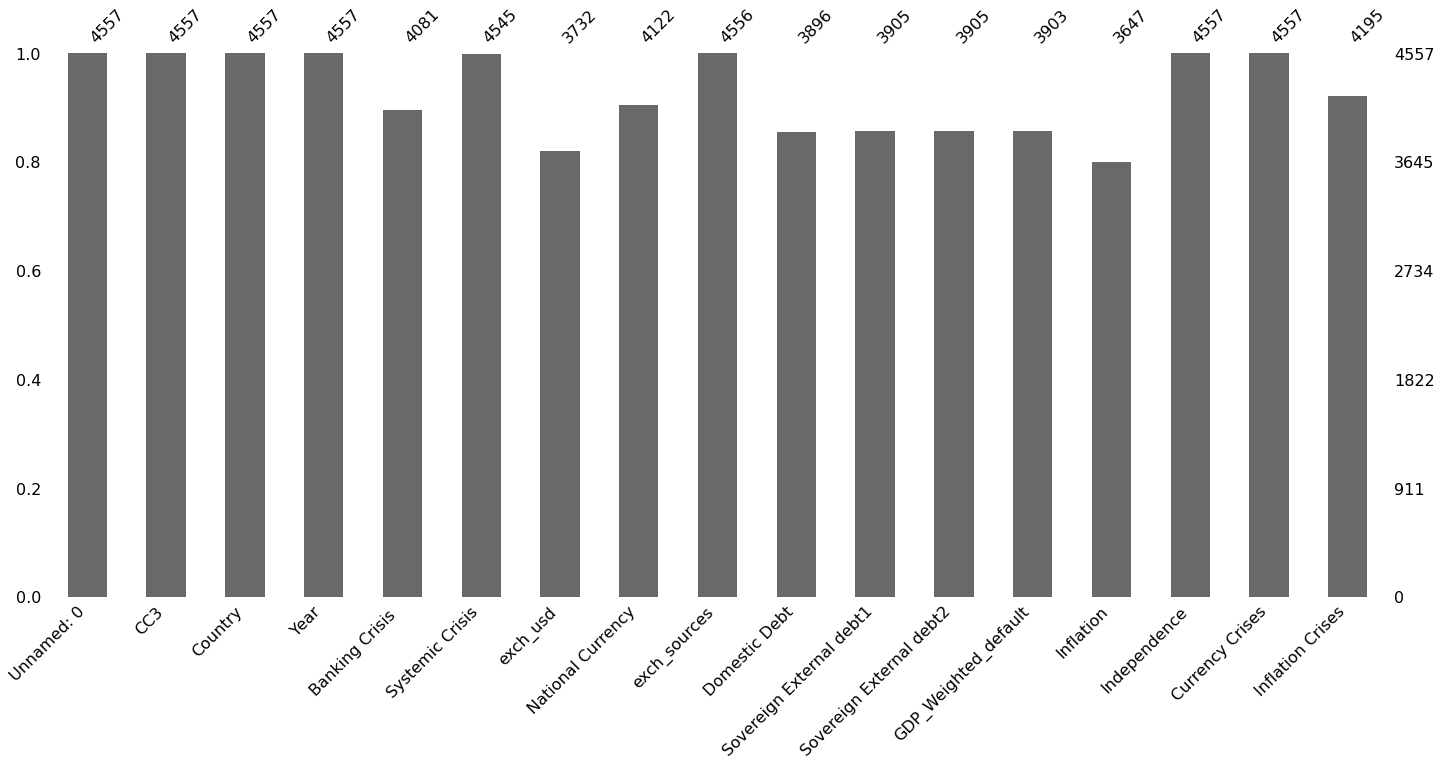

In [ ]:
import missingno as msno

msno.bar(dataset)

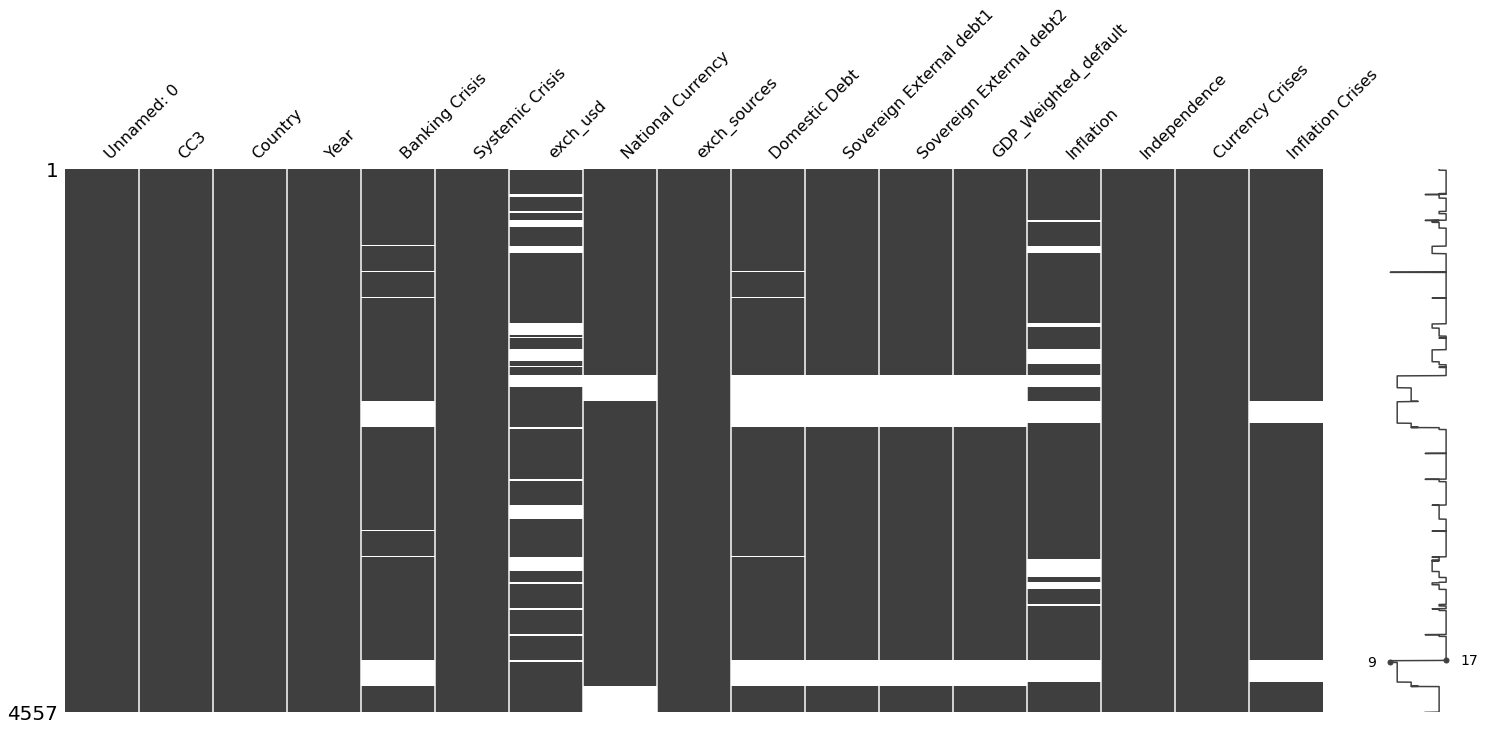

In [ ]:
msno.matrix(dataset)

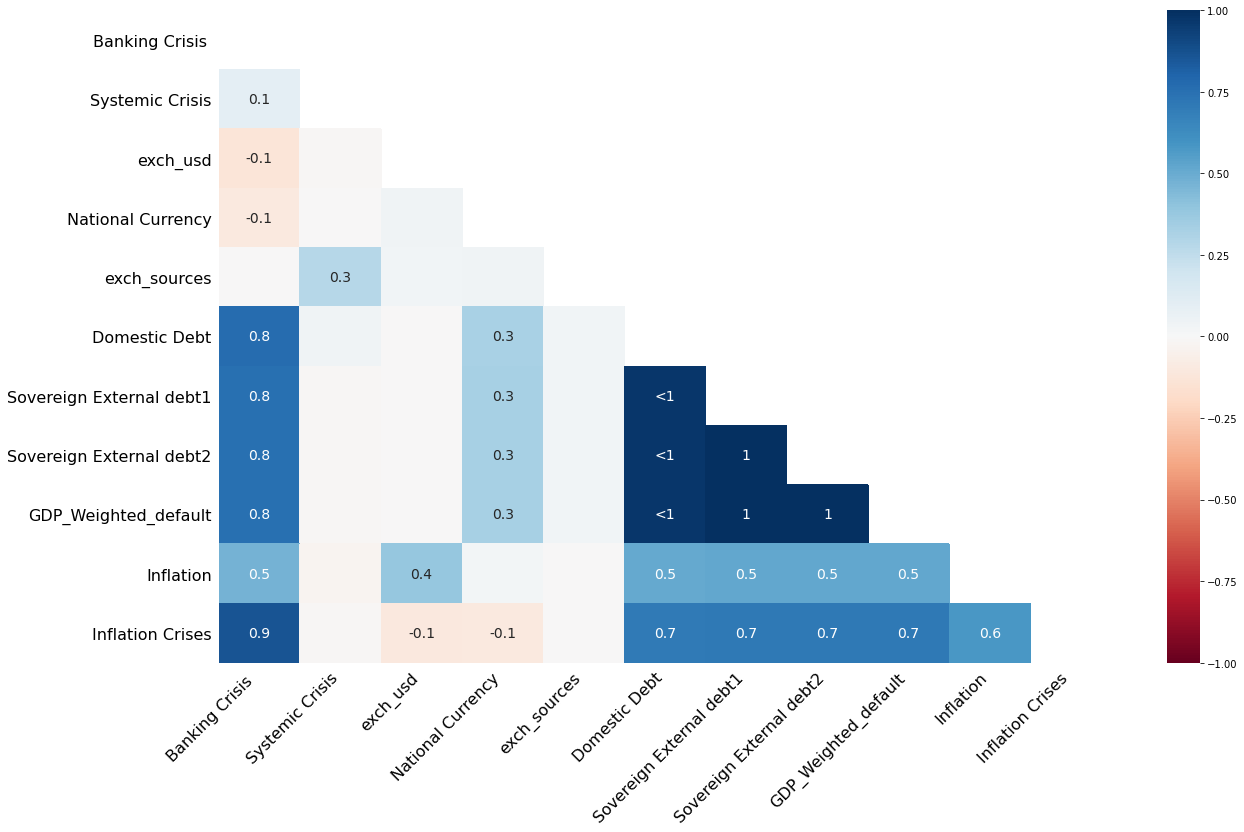

In [ ]:
msno.heatmap(dataset)

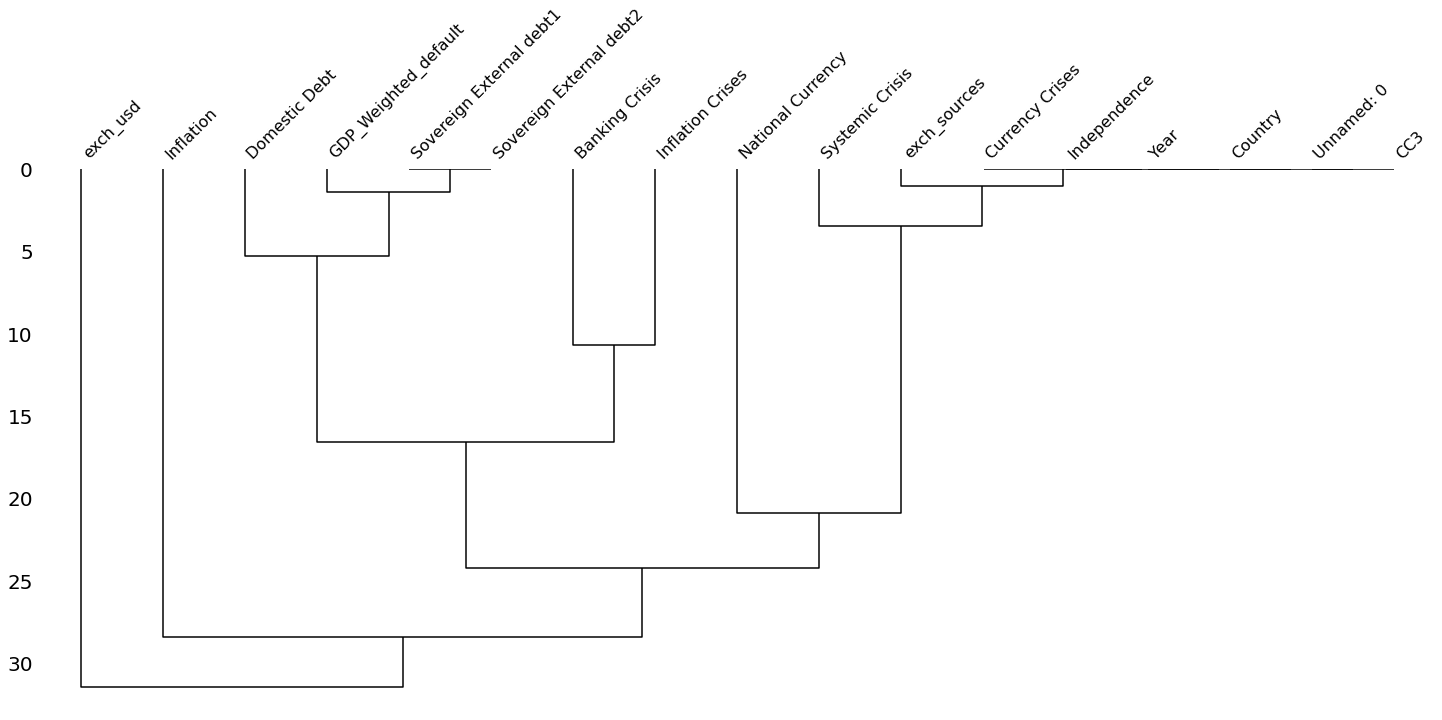

In [ ]:
msno.dendrogram(dataset)

It is very clear that there is a relation between missing values in Sovereign external dept 1, Sovereign external dept 2 and GDP weighted default. There is also a significant corelation between the values of these three columns and the domestic dept, as well as a relationship between the inflation crises and the banking crisis. 

# Handling Missing values

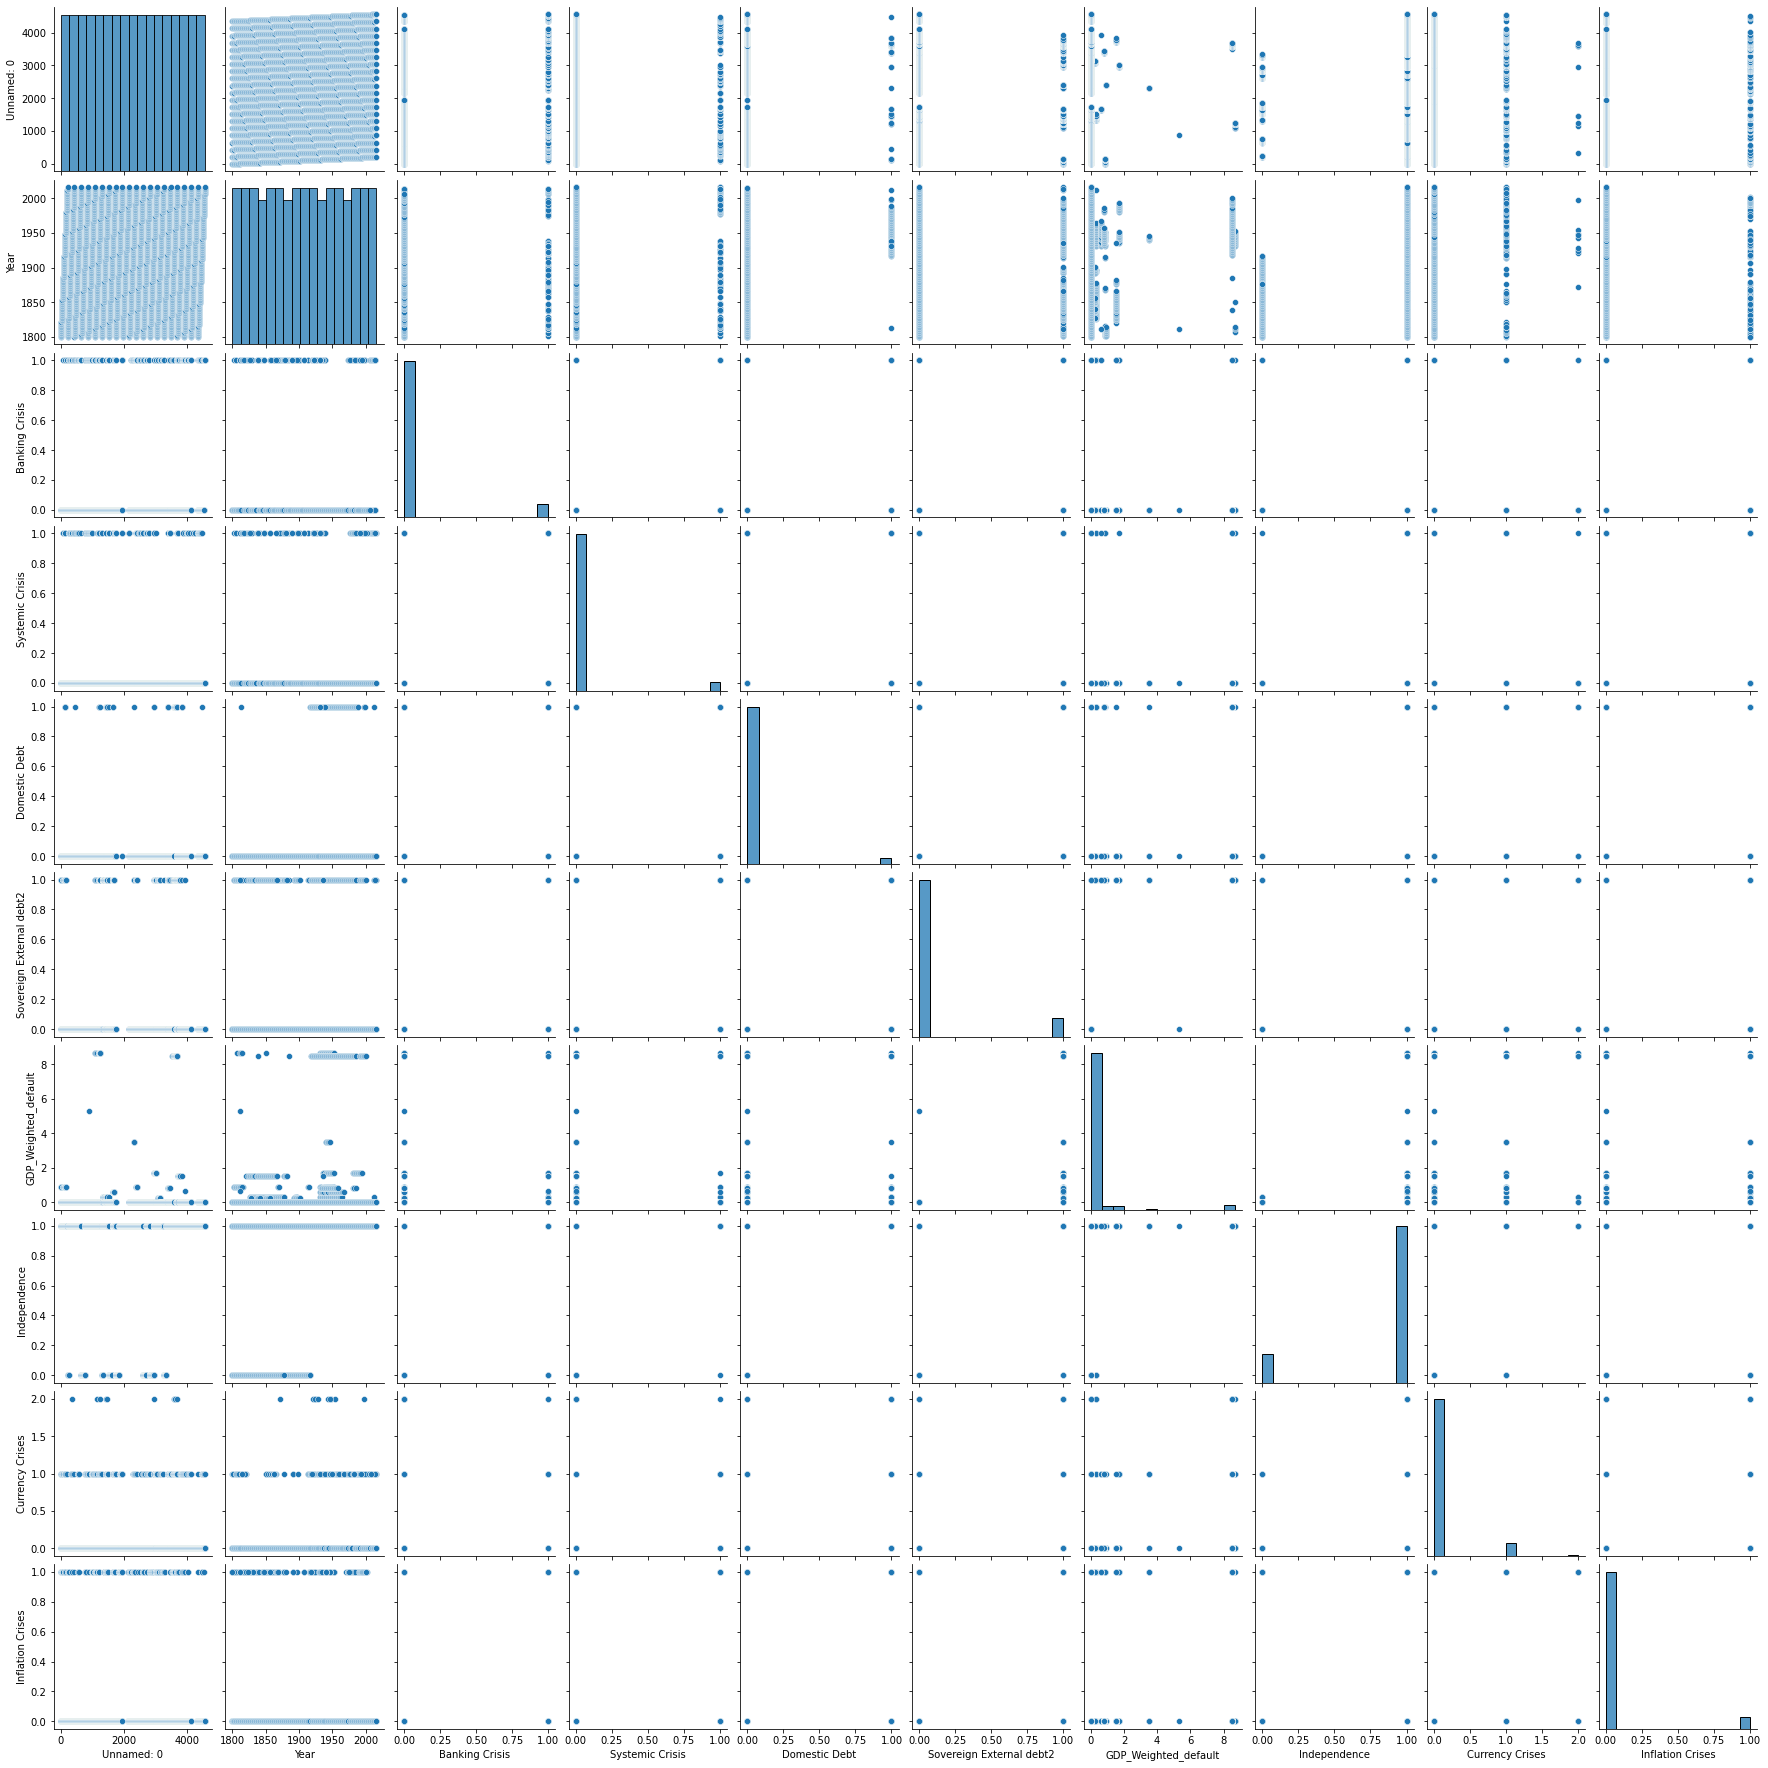

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset)

In [ ]:
t = dataset.copy()

t.drop('exch_sources', axis = 'columns', inplace = True)
t.drop('exch_usd', axis = 'columns', inplace = True)
t.drop('Systemic Crisis', axis = 'columns', inplace = True)
t.drop('National Currency', axis = 'columns', inplace = True)
t.drop('Domestic Debt', axis = 'columns', inplace = True)
t.drop('Sovereign External debt1', axis = 'columns', inplace = True)
t.drop('Sovereign External debt2', axis = 'columns', inplace = True)
t.drop('GDP_Weighted_default', axis = 'columns', inplace = True)
t.drop('Inflation', axis = 'columns', inplace = True)
t.drop('Inflation Crises', axis='columns', inplace=True)


t.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Independence,Currency Crises
0,0,AUT,Austria,1800.0,0.0,1,1
1,1,AUT,Austria,1801.0,0.0,1,1
2,2,AUT,Austria,1802.0,0.0,1,0
3,3,AUT,Austria,1803.0,0.0,1,0
4,4,AUT,Austria,1804.0,0.0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

for_train_and_test = t.copy()

for_prediction = for_train_and_test.loc[pd.isna(for_train_and_test['Banking Crisis '])]
for_prediction.drop('Banking Crisis ', axis = 'columns', inplace = True)

for_train = for_train_and_test.loc[pd.notna(for_train_and_test['Banking Crisis '])]
x_train = for_train.copy()
x_train.drop('Banking Crisis ', axis = 'columns', inplace = True)
type(for_prediction)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


pandas.core.frame.DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
x_train['CC3'] = le.fit_transform(x_train['CC3'])
x_train['Country'] = le.fit_transform(x_train['Country'])
for_prediction['CC3'] = le.fit_transform(for_prediction['CC3'])
for_prediction['Country'] = le.fit_transform(for_prediction['Country'])

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.linear_model import LinearRegression

scaler.fit(for_prediction)
for_prediction = scaler.transform(for_prediction)

model = LinearRegression().fit(x_train, for_train['Banking Crisis '])

y_pred = model.predict(for_prediction)


In [ ]:
for_prediction = for_train_and_test.loc[pd.isna(for_train_and_test['Banking Crisis '])]
for_prediction['Banking Crisis '] = y_pred.tolist()
for_prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,CC3,Country,Year,Banking Crisis,Independence,Currency Crises
215,215,AUT,Austria,2015.0,0.103847,1,0
216,216,AUT,Austria,2016.0,0.104507,1,0
432,432,BEL,Belgium,2015.0,0.104727,1,0
433,433,BEL,Belgium,2016.0,0.105387,1,0
649,649,DNK,Denmark,2015.0,0.097212,1,0
...,...,...,...,...,...,...,...
4337,4337,CHE,Switzerland,2014.0,0.191271,1,0
4338,4338,CHE,Switzerland,2015.0,0.191931,1,0
4339,4339,CHE,Switzerland,2016.0,0.192591,1,0
4555,4555,GBR,United Kingdom,2015.0,0.171822,1,0


In [ ]:
from sklearn.impute import SimpleImputer
import math

t_data = dataset.copy()
br = 0;

pom = t_data['Banking Crisis ']
values = y_pred.tolist()

for i in range(len(pom)):
  if math.isnan(pom[i]):
    pom[i] = values[br]
    br = br + 1
pom

t_data['Banking Crisis '] = pom
t_data.isnull().sum()

main_imputer = SimpleImputer(strategy = "most_frequent")
t_data.iloc[:,:] = main_imputer.fit_transform(t_data)
t_data.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Unnamed: 0                  0
CC3                         0
Country                     0
Year                        0
Banking Crisis              0
Systemic Crisis             0
exch_usd                    0
National Currency           0
exch_sources                0
Domestic Debt               0
Sovereign External debt1    0
Sovereign External debt2    0
GDP_Weighted_default        0
Inflation                   0
Independence                0
Currency Crises             0
Inflation Crises            0
dtype: int64

# <font color = 'Orange'> Encode non numerical values </font>

In [ ]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
t_data['CC3'] = le.fit_transform(t_data['CC3'])
t_data['Country'] = le.fit_transform(t_data['Country'])
t_data['exch_sources'] = le.fit_transform(t_data['exch_sources'])
t_data['National Currency'] = le.fit_transform(t_data['exch_sources'])
t_data

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,0,0,1800.0,0.000000,0.0,0,17,17,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,0,0,1801.0,0.000000,0.0,0,17,17,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,0,0,1802.0,0.000000,0.0,0,17,17,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,0,0,1803.0,0.000000,0.0,0,17,17,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,0,0,1804.0,0.000000,0.0,0,17,17,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,4552,8,20,2012.0,1.000000,0.0,0.633046988857327,16,16,0.0,0,0.0,0.00,2.801,1,0,0.0
4553,4553,8,20,2013.0,1.000000,0.0,0.639660577613477,16,16,0.0,0,0.0,0.00,2.568,1,0,0.0
4554,4554,8,20,2014.0,1.000000,0.0,0.607729626878255,16,16,0.0,0,0.0,0.00,1.472,1,0,0.0
4555,4555,8,20,2015.0,0.171822,0.0,0.64,16,16,0.0,0,0.0,0.00,0.05,1,0,0.0


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
t_data.to_csv('/content/drive/MyDrive/Datasets/europe_crisis_new.csv', index = False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/europe_crisis_new.csv')
data.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,0,0,1800.0,0.0,0.0,0,17,17,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,0,0,1801.0,0.0,0.0,0,17,17,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,0,0,1802.0,0.0,0.0,0,17,17,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,0,0,1803.0,0.0,0.0,0,17,17,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,0,0,1804.0,0.0,0.0,0,17,17,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0
